
# A demo of the mean-shift clustering algorithm

Reference:

Dorin Comaniciu and Peter Meer, "Mean Shift: A robust approach toward
feature space analysis". IEEE Transactions on Pattern Analysis and
Machine Intelligence. 2002. pp. 603-619.


In [6]:
import numpy as np
import pandas as pd 
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

## Generate sample data



In [29]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=10000, n_features = 10,centers=centers, cluster_std=0.6)

## Compute clustering with MeanShift



In [30]:
pd.DataFrame(X)

,0,1
0,-0.696164,-1.602531
1,0.203683,0.673554
2,0.208715,1.266651
3,0.861512,-0.973352
4,1.492984,1.464162
...,...,...
9995,0.611036,1.284511
9996,0.920095,0.059766
9997,-0.285906,-0.944865
9998,1.060250,-1.402331


# Mean Shift Algorithm

## Overview

Mean shift is a procedure for locating the maxima—the modes—of a density function given discrete data sampled from that function. This is an iterative method, and we start with an initial estimate $\ x $. 

Let a kernel function $\ K(x_i - x) $ be given. This function determines the weight of nearby points for re-estimation of the mean. Typically, a Gaussian kernel on the distance to the current estimate is used:
$\
K(x_i - x) = e^{-c||x_i - x||^2}
$

The weighted mean of the density in the window determined by $\ K $ is:
$\
m(x) = \frac{\sum_{x_i \in N(x)} K(x_i - x) x_i}{\sum_{x_i \in N(x)} K(x_i - x)}
$

where $\ N(x) $ is the neighborhood of $\ x $, a set of points for which $\ K(x_i - x) \neq 0 $.

The difference $\ m(x) - x $ is called the mean shift. The mean-shift algorithm sets $\ x \leftarrow m(x) $ and repeats the estimation until $\ m(x) $ converges.

## Convergence

Although the mean shift algorithm has been widely used in many applications, a rigid proof for the convergence of the algorithm using a general kernel in a high dimensional space is still not known. 

- **One-dimensional case**: Aliyari Ghassabeh showed the convergence with a differentiable, convex, and strictly decreasing profile function.
- **Higher dimensions**: The convergence with a finite number of stationary (or isolated) points has been proved.


In [31]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)
bandwidth

0.6847129149331502

# Estimate Bandwidth Function

## Overview

The `estimate_bandwidth` function is used to estimate the bandwidth parameter for the mean-shift algorithm. The bandwidth parameter determines the window size for the kernel function in the mean-shift algorithm. Estimating an appropriate bandwidth is crucial for the performance of the mean-shift clustering.

## Function Explanation

### Parameters

- **`X`**: An array-like structure of shape `(n_samples, n_features)` representing the input data points.
- **`quantile`**: A float between 0 and 1 (default is 0.3). This quantile value determines which percentile of the pairwise distance distribution is used to estimate the bandwidth. For instance, a quantile of 0.5 uses the median of all pairwise distances.
- **`n_samples`**: An integer (default is `None`). The number of samples to use for bandwidth estimation. If `None`, all samples in `X` are used.
- **`random_state`**: An integer or `RandomState` instance (default is `None`). Used to control the randomness of the subsampling of input points for bandwidth estimation. Setting this ensures reproducibility.
- **`n_jobs`**: An integer (default is `None`). The number of parallel jobs to run for neighbors search. `None` means 1, and `-1` means using all processors.

### Returns

- **`bandwidth`**: A float representing the estimated bandwidth parameter.

### Steps of the Function

1. **Input Validation**: 
   - The input data `X` is checked for validity using `check_array(X)`.
   
2. **Subsampling**: 
   - If `n_samples` is provided, a random subset of `X` of size `n_samples` is selected.
   
3. **Number of Neighbors**:
   - The number of neighbors `n_neighbors` is set to the integer value of `X.shape[0] * quantile`.
   
4. **Nearest Neighbors Fit**:
   - A `NearestNeighbors` model is fitted on the (subsampled) data `X` using the specified number of neighbors.
   
5. **Bandwidth Calculation**:
   - For each batch of 500 samples, the maximum distance to the nearest neighbors is computed and summed.
   - The final bandwidth is calculated as the average of these maximum distances.

### Mathematical Explanation

Given a dataset \( X \) with \( n \) samples and \( d \) features, the function estimates the bandwidth \( h \) as follows:

1. **Subsampling** (if \( n_{\text{samples}} \) is specified):
   \[
   X' = \text{random subset of } X \text{ of size } n_{\text{samples}}
   \]

2. **
The quantile is used in KNN (which is used inside the estimate_bandwidth function) to determine the bandwidth.
Concretely:

n = Number of samples in KNN = number of samples in the batch * quantile
Bandwidth will be then calculated based on the average pairwise distances between the samples that are in the same cluster (returned by KNN). So you can use this to kind of figure out how to set the bandwidth. The bandwidth that is returned by this function will, on average, cover n samples, which will strongly affect the number of clusters that Mean Shift will return.

In [32]:

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


## Plot result



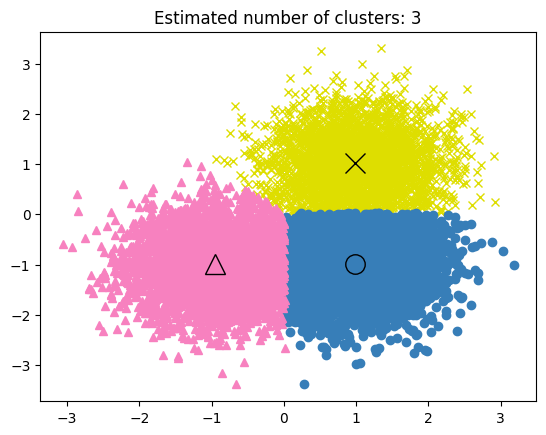

In [33]:
import matplotlib.pyplot as plt

plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()